# In this python project, I have gathered AirBnb data from Kaggle, it has various files related to Users and their demography. It also contails data about 8 Countries and no of visitors for each age group bucket. We will try to explore data and come up with some findings about it.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

# Now, we will be importing the necessary files needed for or project

In [61]:
Countries = pd.read_csv('airBNB/countries.csv')
test_users = pd.read_csv('airBNB/test_users.csv')
train_users = pd.read_csv('airBNB/train_users_2.csv')
age_bkt = pd.read_csv('airBNB/age_gender_bkts.csv')
user_session = pd.read_csv('airBNB/sessions.csv')

In [62]:
user_session.head(5)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


# Now we create a new table from user_session file to that we can aggregate data for each user to get the time spent n airbnb site


In [63]:
Total_time_spent_by_user=user_session.groupby('user_id').agg({'secs_elapsed':['sum','count']})

In [64]:
Total_time_spent_by_user.columns= Total_time_spent_by_user.columns.droplevel(1)
Total_time_spent_by_user=Total_time_spent_by_user.reset_index()


In [66]:
Total_time_spent_by_user.columns = ['id','secs_elapsed','No_of_Sessions_per_User' ]
Total_time_spent_by_user

,id,secs_elapsed,No_of_Sessions_per_User
0,00023iyk9l,867896.0,39
1,0010k6l0om,586543.0,62
2,001wyh0pz8,282965.0,89
3,0028jgx1x1,297010.0,30
4,002qnbzfs5,6487080.0,788
5,0031awlkjq,39574.0,7
6,0035hobuyj,5724670.0,488
7,00378ocvlh,1827164.0,74
8,00389675gq,2605711.0,176
9,003iamz20l,1590236.0,162


In [67]:
#Secs elapsed is not intuitive so we will convert it into hours spent. There can be high usage ids which spend a lot of time
#on airbnb but it could be because they left thier browser on
Total_time_spent_by_user['Time_in_hours']=Total_time_spent_by_user['secs_elapsed']/3600

In [ ]:
Total_time_spent_by_user


# Now we fill try to find out some summary statistics based on this data

In [69]:
Total_time_spent_by_user['Time_in_hours'].max(),Total_time_spent_by_user['Time_in_hours'].mean(),Total_time_spent_by_user['Time_in_hours'].median()

(10617.045277777777, 413.81455612921997, 236.1863888888889)

# We might be able to get more insights if we join the Session data with User Data(Train_set)

In [72]:
User_With_Session_Statistic =pd.merge(train_users,Total_time_spent_by_user, on='id', how='left' )

In [77]:
User_With_Session_Statistic.tail(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed,No_of_Sessions_per_User,Time_in_hours
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,5141396.0,109.0,1428.165556
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,2878924.0,237.0,799.701111
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,NaN,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,342982.0,17.0,95.272778
213449,jh95kwisub,2014-06-30,20140630235822,NaN,NaN,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF,341609.0,74.0,94.891389
213450,nw9fwlyb5f,2014-06-30,20140630235824,NaN,NaN,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,2759210.0,40.0,766.447222


In [76]:
#In the gender column we have lot of unknow, so we will replace them with nan
User_With_Session_Statistic.gender.replace('-unknown-', np.nan, inplace=True)

In [78]:
age_bkt.head(5)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


# reshaping the Age bucket data which will be used later to join with the user data

In [84]:

age_bkt.pivot_table(index='country_destination',columns='age_bucket',values='population_in_thousands',aggfunc='sum')

age_bucket,0-4,10-14,100+,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99
country_destination,,,,,,,,,,,,,,,,,,,,,
AU,1605.0,1450.0,5.0,1505.0,1607.0,1746.0,1746.0,1598.0,1658.0,1571.0,...,1576.0,1453.0,1296.0,1166.0,853.0,636.0,451.0,297.0,141.0,34.0
CA,2036.0,1912.0,8.0,2063.0,2362.0,2493.0,2502.0,2381.0,2348.0,2449.0,...,2791.0,2592.0,2236.0,1887.0,1365.0,976.0,740.0,483.0,221.0,55.0
DE,3524.0,3692.0,17.0,4050.0,4427.0,5088.0,5198.0,4850.0,5192.0,6882.0,...,7127.0,5979.0,5374.0,4137.0,4461.0,4353.0,2502.0,1505.0,645.0,88.0
ES,2470.0,2313.0,12.0,2114.0,2281.0,2627.0,3394.0,4083.0,3976.0,3761.0,...,3460.0,3010.0,2551.0,2370.0,1920.0,1594.0,1402.0,869.0,368.0,86.0
FR,3973.0,3879.0,22.0,3932.0,3987.0,4122.0,4081.0,3698.0,4443.0,4414.0,...,4357.0,4064.0,3956.0,3765.0,2420.0,2141.0,1849.0,1243.0,629.0,102.0
GB,3869.0,3461.0,16.0,3647.0,4018.0,4335.0,4302.0,3943.0,4248.0,4650.0,...,4526.0,3916.0,3468.0,3593.0,2695.0,2144.0,1557.0,967.0,455.0,110.0
IT,2851.0,2856.0,18.0,2904.0,3115.0,3283.0,3605.0,4207.0,4839.0,4956.0,...,4695.0,4045.0,3629.0,3609.0,2905.0,2725.0,2039.0,1295.0,600.0,101.0
NL,900.0,1010.0,2.0,994.0,1031.0,1023.0,1000.0,980.0,1165.0,1287.0,...,1282.0,1161.0,1047.0,1045.0,726.0,541.0,389.0,229.0,94.0,19.0
PT,464.0,554.0,1.0,543.0,560.0,608.0,733.0,833.0,834.0,781.0,...,775.0,709.0,649.0,580.0,484.0,421.0,316.0,174.0,64.0,12.0


# Lets now delete the rows which have NaN in gender, age and destination

In [89]:
User_With_Session_Statistic=User_With_Session_Statistic.dropna(subset=['gender','age'])


In [98]:
User_With_Session_Statistic=User_With_Session_Statistic.reset_index()

In [100]:
User_With_Session_Statistic.drop(columns=['index'])

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed,No_of_Sessions_per_User,Time_in_hours
0,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN
1,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,NaN,NaN,NaN
2,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,NaN,NaN,NaN
3,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,NaN,NaN,NaN
4,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,NaN,NaN,NaN
5,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,NaN,NaN,NaN
6,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US,NaN,NaN,NaN
7,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF,NaN,NaN,NaN
8,dy3rgx56cu,2010-01-05,20100105083259,NaN,FEMALE,37.0,basic,0,en,other,craigslist,linked,Web,Mac Desktop,Firefox,NDF,NaN,NaN,NaN
9,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF,NaN,NaN,NaN


In [102]:
#Checking shape ofthe dataframe
User_With_Session_Statistic.shape

(108618, 20)

In [103]:
User_With_Session_Statistic.head(5)

,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed,No_of_Sessions_per_User,Time_in_hours
0,1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN
1,2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,NaN,NaN,NaN
2,3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,NaN,NaN,NaN
3,6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,NaN,NaN,NaN
4,7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,NaN,NaN,NaN


# Now lets create some visualizations - 
1. Gender vs Destination
2. Most popular Destination
3. Most famous sign up methods
4. What are the nationality of people who are using AirBNB

Text(0, 0.5, 'count')

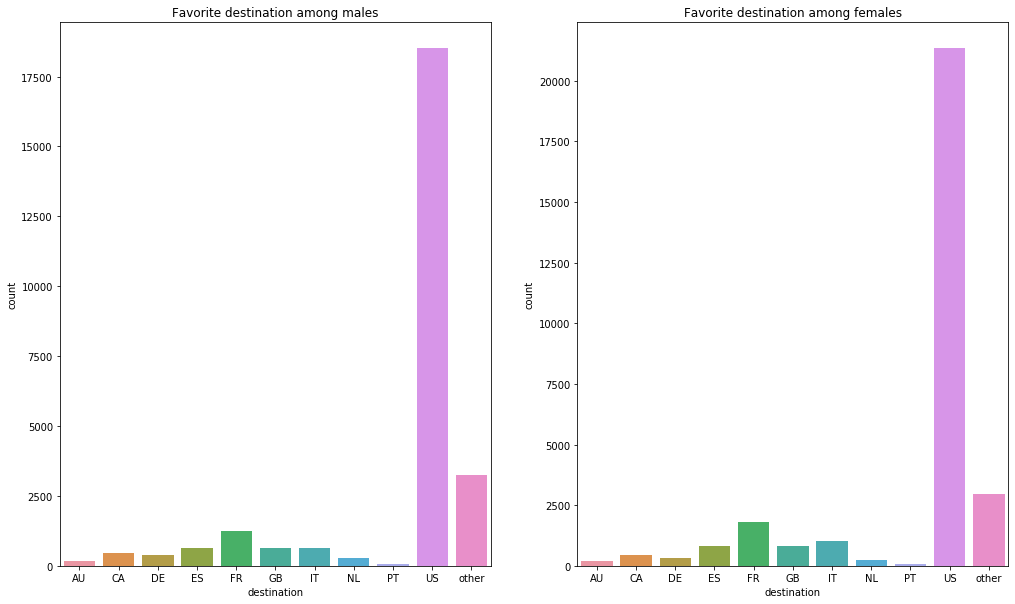

In [150]:
fig, ax =plt.subplots(1,2, figsize=(17,10))
MALE_DATA=User_With_Session_Statistic.loc[User_With_Session_Statistic['gender'] == 'MALE'  ]
MALE_DATA=MALE_DATA.loc[MALE_DATA['country_destination'] != 'NDF'  ]
MALE_DATA=MALE_DATA.groupby('country_destination').agg({'id':['count']})
MALE_DATA.columns = MALE_DATA.columns.droplevel(1)
MALE_DATA=MALE_DATA.reset_index()
MALE_DATA.columns = ['country_destination','id']

FEMALE_DATA=User_With_Session_Statistic.loc[User_With_Session_Statistic['gender'] == 'FEMALE'  ]
FEMALE_DATA=FEMALE_DATA.loc[FEMALE_DATA['country_destination'] != 'NDF'  ]
FEMALE_DATA=FEMALE_DATA.groupby('country_destination').agg({'id':['count']})
FEMALE_DATA.columns = FEMALE_DATA.columns.droplevel(1)
FEMALE_DATA=FEMALE_DATA.reset_index()
FEMALE_DATA.columns = ['country_destination','id']

sns.barplot(x='country_destination',y='id',data=MALE_DATA,ax=ax[0]);
ax[0].set_title("Favorite destination among males")
ax[0].set_xlabel("destination")
ax[0].set_ylabel("count")

sns.barplot(x='country_destination',y='id',data=FEMALE_DATA,ax=ax[1]);
ax[1].set_title("Favorite destination among females")
ax[1].set_xlabel("destination")
ax[1].set_ylabel("count")

# It is clearly visible that US is the most popular destination for the travellers but what can be one of the reason?
Although, there can be multiple region but language spoken by the traveller and the destination country plays
an important role too. SO lets see the distribution of travellers by language

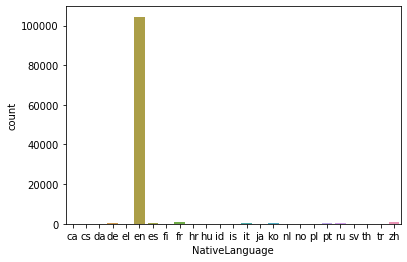

In [174]:
Language_data=User_With_Session_Statistic.groupby('language').agg({'id':['count']})
Language_data.columns = Language_data.columns.droplevel(1)
Language_data=Language_data.reset_index()
Language_data.columns = ['NativeLanguage','count']


sns.barplot(x='NativeLanguage',y='count',data=Language_data);

# Now lets see how users are reaching to the signup page of AirBNB

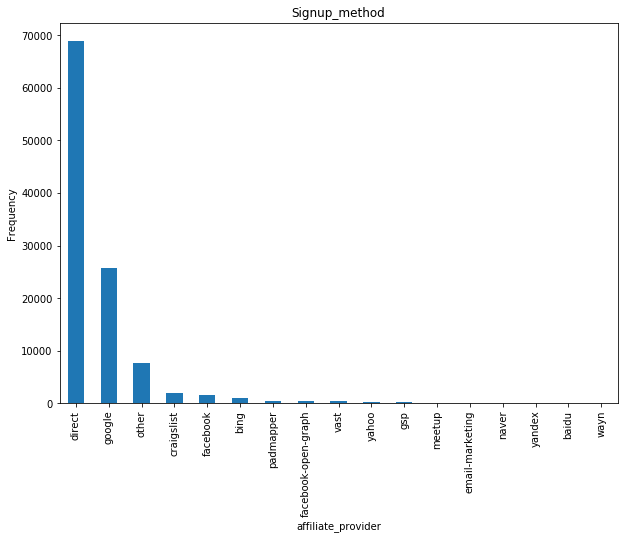

In [160]:
plt.figure(figsize=(10,7))
ax = User_With_Session_Statistic['NativeLanguage'].value_counts().plot(kind='bar',title="Signup_method")
ax.set_xlabel("affiliate_provider")
ax.set_ylabel("Frequency");

# Now we try to build a simple linear regression model to predict the destination for the test dataset based on 
1. Gender
2. Age
3. Language